In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def plot_circle(diameter,line_color):
    theta = np.linspace(0,2*np.pi,200)
    a = diameter*np.cos(theta)/2
    b = diameter*np.sin(theta)/2
    plt.xlim(-diameter/2-10,diameter/2+10)
    plt.ylim(-diameter/2-10,diameter/2+10)
    plt.plot(a,b,color=line_color)

In [3]:
def create_grid_in_circle(diameter, grid_width):
    n = int(diameter/grid_width)-1
    x = np.linspace(-grid_width*n/2, grid_width*n/2, n+1)
    y = np.linspace(-grid_width*n/2, grid_width*n/2, n+1)
    x_meshgrid, y_meshgrid = np.meshgrid(x, y)
    x_list = []
    y_list = []
    for i in range(len(x_meshgrid.tolist())):
        x_list += x_meshgrid.tolist()[i]
    for i in range(len(y_meshgrid.tolist())):
        y_list += y_meshgrid.tolist()[i]
    grid = {}
    grid_out_of_circle = {}
    out_of_circle_index = []
    for x,y in zip(x_list,y_list):
        grid[(x,y)] = [(x-grid_width/2,y+grid_width/2),(x+grid_width/2,y+grid_width/2),(x+grid_width/2,y-grid_width/2),(x-grid_width/2,y-grid_width/2),(x-grid_width/2,y+grid_width/2)]
    grid_center = list(grid.keys())
    grid_edge = list(grid.values())
    for i in range(len(grid)):
        grid_in_circle = True
        for x,y in grid_edge[i]:
            if (x**2+y**2)**0.5 > diameter/2:
                grid_in_circle = False
                break
        if grid_in_circle == False:
            grid_out_of_circle[grid_center[i]] = grid.pop(grid_center[i])
            out_of_circle_index.append(i)
    grid_in_circle = grid
    return grid_in_circle, grid_out_of_circle, out_of_circle_index

In [4]:
def get_2D_histogram_data(diameter, grid_width, data_x, data_y):
    n = int(diameter/grid_width)
    x_bins = np.linspace(-grid_width*n/2, grid_width*n/2, n+1)
    y_bins = np.linspace(-grid_width*n/2, grid_width*n/2, n+1)
    H, xbins, ybins = np.histogram2d(data_x, data_y, bins=(x_bins, y_bins))
    H = H.T.tolist()
    H_list = []
    for i in range(len(H)):
        H_list += H[i]
    grid_in_circle, grid_out_of_circle, out_of_circle_index = create_grid_in_circle(diameter,grid_width)
    H_list_in_circle = []
    for i in range(len(H_list)):
        if i not in out_of_circle_index:
            H_list_in_circle.append(H_list[i])
    return H_list_in_circle

In [5]:
def plot_2D_histogram(diameter, grid_width, data_x, data_y):
    n = int(diameter/grid_width)
    x_bins = np.linspace(-grid_width*n/2, grid_width*n/2, n+1)
    y_bins = np.linspace(-grid_width*n/2, grid_width*n/2, n+1)
    plt.hist2d(data_x, data_y, bins =(x_bins, y_bins))
    plt.colorbar()
    grid_in_circle, grid_out_of_circle, out_of_circle_index = create_grid_in_circle(diameter,grid_width)
    plot_circle(diameter,'black')
    mask_grid_x = []
    mask_grid_y = []
    for x,y in list(grid_out_of_circle.keys()):
        mask_grid_x.append(x)
        mask_grid_y.append(y)
    plt.scatter(mask_grid_x, mask_grid_y, s=14*grid_width, c='w', marker='s')
    for k,v in grid_in_circle.items():
        grid_x = []
        grid_y = []
        for x,y in v:
            grid_x.append(x)
            grid_y.append(y)
        plt.plot(grid_x,grid_y,color='grey',linewidth=1.0)

In [6]:
def generate_data(diameter, total_defects):
    data_x = []
    data_y = []
    while len(data_x) <= total_defects:
        x = np.random.uniform(-diameter/2, diameter/2)
        y = np.random.uniform(-diameter/2, diameter/2)
        if (x**2 + y**2)**0.5 <= diameter/2:
            data_x.append(x)
            data_y.append(y)
    return data_x, data_y

### 1. Point defect

In [7]:
defect_density = 0.1
total_defects = defect_density*np.pi*(15/2)**2
total_defects = int(total_defects)

In [8]:
data_x, data_y = generate_data(150, total_defects)

In [9]:
grid_in_circle, grid_out_of_circle, out_of_circle_index = create_grid_in_circle(150, 5)

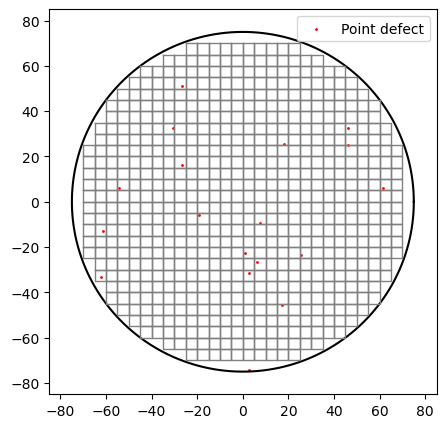

In [10]:
plt.figure(figsize=(5,5))
plot_circle(150,"black")
for k,v in grid_in_circle.items():
    grid_x = []
    grid_y = []
    for x,y in v:
        grid_x.append(x)
        grid_y.append(y)
    plt.plot(grid_x, grid_y, color='grey',linewidth=1.0)
plt.scatter(data_x, data_y, color='red', s=1, label="Point defect")
plt.legend()

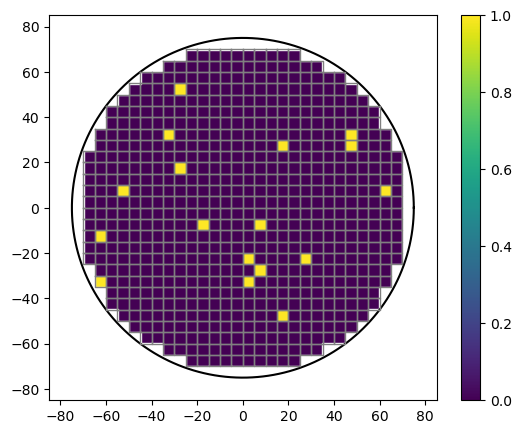

In [11]:
plt.figure(figsize=(6.25, 5))
plot_2D_histogram(150, 5, data_x, data_y)

In [12]:
failure_rates = []
threshold = 1
for i in range(100):
    data_x, data_y = generate_data(150, total_defects)
    defects_in_grids = np.array(get_2D_histogram_data(150, 5, data_x, data_y))
    failure_rate_value = len(defects_in_grids[defects_in_grids>=threshold])/len(defects_in_grids)
    failure_rates.append(failure_rate_value)
failure_rate = np.mean(failure_rates)*100

In [13]:
failure_rate

2.5123456790123457

Text(0, 0.5, 'Die yield loss %')

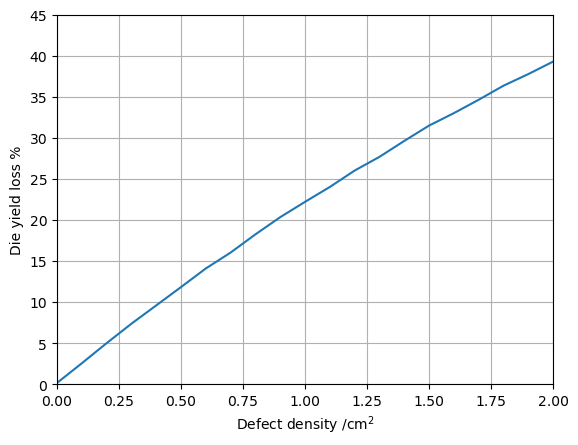

In [14]:
failure_rates_for_point_defect = []
for dd in np.linspace(0, 2, 21):
    defect_density = dd
    total_defects = defect_density*np.pi*(15/2)**2
    total_defects = int(total_defects)
    failure_rates = []
    threshold = 1
    for i in range(100):
        data_x, data_y = generate_data(150, total_defects)
        defects_in_grids = np.array(get_2D_histogram_data(150, 5, data_x, data_y))
        failure_rate_value = len(defects_in_grids[defects_in_grids>=threshold])/len(defects_in_grids)
        failure_rates.append(failure_rate_value)
    failure_rate = np.mean(failure_rates)*100
    failure_rates_for_point_defect.append(failure_rate)
plt.plot(np.linspace(0, 2, 21), failure_rates_for_point_defect)
plt.grid()
plt.xlim(0, 2)
plt.ylim(0, 45)
plt.xlabel('Defect density /cm$^2$')
plt.ylabel('Die yield loss %')

### 2. Unusable area

In [15]:
ua_grid_in_circle, ua_grid_out_of_circle, ua_out_of_circle_index = create_grid_in_circle(150, 2)

In [16]:
unusable_rate = 1/100
unusable_indices = random.sample(range(len(ua_grid_in_circle)), int(unusable_rate*len(ua_grid_in_circle)))

c:\Users\fhan\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


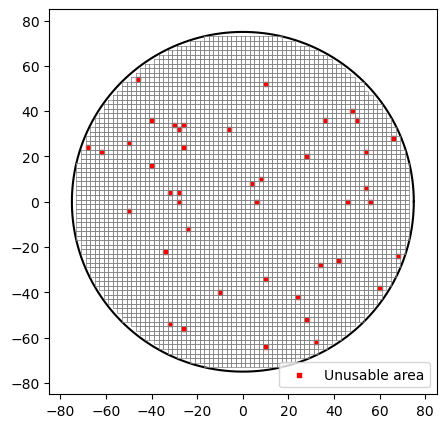

In [17]:
plt.figure(figsize=(5,5))
plot_circle(150,"black")
for k,v in ua_grid_in_circle.items():
    grid_x = []
    grid_y = []
    for x,y in v:
        grid_x.append(x)
        grid_y.append(y)
    plt.plot(grid_x, grid_y, color='grey',linewidth=0.5)
unusable_x = []
unusable_y = []
keys_list = list(ua_grid_in_circle.keys())
for i in unusable_indices:
    unusable_x.append(keys_list[i][0])
    unusable_y.append(keys_list[i][1])
plt.scatter(unusable_x,unusable_y, marker='s', s=10, color='red', label="Unusable area")
plt.legend()

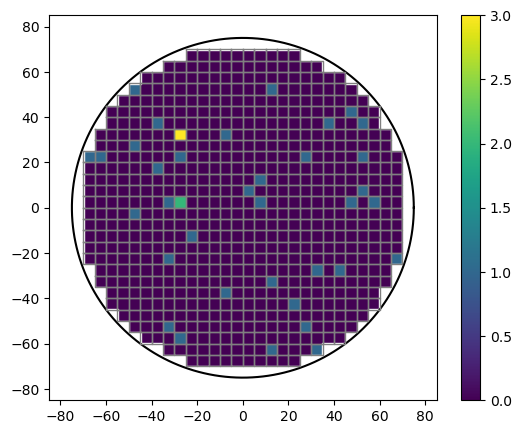

In [18]:
plt.figure(figsize=(6.25, 5))
plot_2D_histogram(150, 5, unusable_x,unusable_y)

In [19]:
failure_rates = []
threshold = 1
for i in range(100):
    data_x, data_y = generate_data(150, total_defects)
    defects_in_grids = np.array(get_2D_histogram_data(150, 5, unusable_x,unusable_y))
    failure_rate_value = len(defects_in_grids[defects_in_grids>=threshold])/len(defects_in_grids)
    failure_rates.append(failure_rate_value)
failure_rate = np.mean(failure_rates)*100

In [20]:
failure_rate

5.7098765432098775

Text(0, 0.5, 'Die yield loss %')

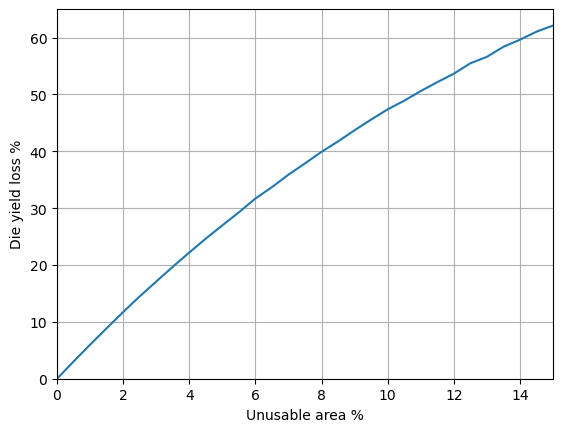

In [21]:
failure_rates_for_unusable_area = []
for ur in np.linspace(0, 15, 31):
    unusable_rate = ur/100
    failure_rates = []
    threshold = 1
    for i in range(100):
        unusable_indices = random.sample(range(len(ua_grid_in_circle)), int(unusable_rate*len(ua_grid_in_circle)))
        unusable_x = []
        unusable_y = []
        keys_list = list(ua_grid_in_circle.keys())
        for i in unusable_indices:
            unusable_x.append(keys_list[i][0])
            unusable_y.append(keys_list[i][1])
        defects_in_grids = np.array(get_2D_histogram_data(150, 5, unusable_x, unusable_y))
        failure_rate_value = len(defects_in_grids[defects_in_grids>=threshold])/len(defects_in_grids)
        failure_rates.append(failure_rate_value)
    failure_rate = np.mean(failure_rates)*100
    failure_rates_for_unusable_area.append(failure_rate)
plt.plot(np.linspace(0, 15, 31), failure_rates_for_unusable_area)
plt.grid()
plt.xlim(0, 15)
plt.ylim(0, 65)
plt.xlabel('Unusable area %')
plt.ylabel('Die yield loss %')

### 3. Combine two types of defects

In [22]:
defect_density = 0.1
total_defects = defect_density*np.pi*(15/2)**2
total_defects = int(total_defects)
data_x, data_y = generate_data(150, total_defects)

In [23]:
unusable_rate = 1/100
unusable_indices = random.sample(range(len(ua_grid_in_circle)), int(unusable_rate*len(ua_grid_in_circle)))
unusable_x = []
unusable_y = []
keys_list = list(ua_grid_in_circle.keys())
for i in unusable_indices:
    unusable_x.append(keys_list[i][0])
    unusable_y.append(keys_list[i][1])

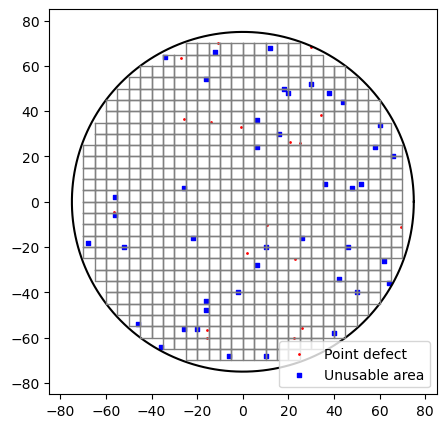

In [24]:
plt.figure(figsize=(5,5))
plot_circle(150,"black")
for k,v in grid_in_circle.items():
    grid_x = []
    grid_y = []
    for x,y in v:
        grid_x.append(x)
        grid_y.append(y)
    plt.plot(grid_x, grid_y, color='grey',linewidth=1.0)
plt.scatter(data_x, data_y, color='red', s=1, label="Point defect")
plt.scatter(unusable_x,unusable_y, marker='s', s=10, color='blue', label="Unusable area")
plt.legend()

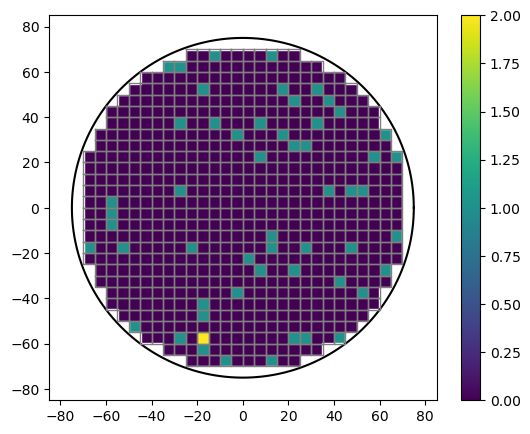

In [25]:
data_x = data_x + unusable_x
data_y = data_y + unusable_y
plt.figure(figsize=(6.25, 5))
plot_2D_histogram(150, 5, data_x, data_y)

In [26]:
failure_rates = []
threshold = 1
for i in range(100):
    data_x, data_y = generate_data(150, total_defects)
    unusable_indices = random.sample(range(len(ua_grid_in_circle)), int(unusable_rate*len(ua_grid_in_circle)))
    unusable_x = []
    unusable_y = []
    keys_list = list(ua_grid_in_circle.keys())
    for i in unusable_indices:
        unusable_x.append(keys_list[i][0])
        unusable_y.append(keys_list[i][1])
    data_x = data_x + unusable_x
    data_y = data_y + unusable_y
    defects_in_grids = np.array(get_2D_histogram_data(150, 5, data_x, data_y))
    failure_rate_value = len(defects_in_grids[defects_in_grids>=threshold])/len(defects_in_grids)
    failure_rates.append(failure_rate_value)
failure_rate = np.mean(failure_rates)*100

In [27]:
failure_rate

8.342592592592592

In [28]:
total_failure_rates = []
dds = []
urs = []
for dd in np.linspace(0, 2, 21):
    for ur in np.linspace(0, 15, 31):
        dds.append(dd)
        urs.append(ur)
        
        defect_density = dd
        total_defects = defect_density*np.pi*(15/2)**2
        total_defects = int(total_defects)
        data_x, data_y = generate_data(150, total_defects)

        unusable_rate = ur/100
        unusable_indices = random.sample(range(len(ua_grid_in_circle)), int(unusable_rate*len(ua_grid_in_circle)))
        unusable_x = []
        unusable_y = []
        keys_list = list(ua_grid_in_circle.keys())
        for i in unusable_indices:
            unusable_x.append(keys_list[i][0])
            unusable_y.append(keys_list[i][1])

        failure_rates = []
        threshold = 1
        for i in range(20):
            data_x, data_y = generate_data(150, total_defects)
            unusable_indices = random.sample(range(len(ua_grid_in_circle)), int(unusable_rate*len(ua_grid_in_circle)))
            unusable_x = []
            unusable_y = []
            keys_list = list(ua_grid_in_circle.keys())
            for i in unusable_indices:
                unusable_x.append(keys_list[i][0])
                unusable_y.append(keys_list[i][1])
            data_x = data_x + unusable_x
            data_y = data_y + unusable_y
            defects_in_grids = np.array(get_2D_histogram_data(150, 5, data_x, data_y))
            failure_rate_value = len(defects_in_grids[defects_in_grids>=threshold])/len(defects_in_grids)
            failure_rates.append(failure_rate_value)
        failure_rate = np.mean(failure_rates)*100
        total_failure_rates.append(failure_rate)

In [29]:
from scipy.interpolate import griddata

xi = np.linspace(0, 2, 100)
yi = np.linspace(0, 15, 100)
X, Y = np.meshgrid(xi, yi)
Z = griddata((dds, urs), total_failure_rates, (X, Y), method='cubic')

Text(0, 0.5, 'Unusable area %')

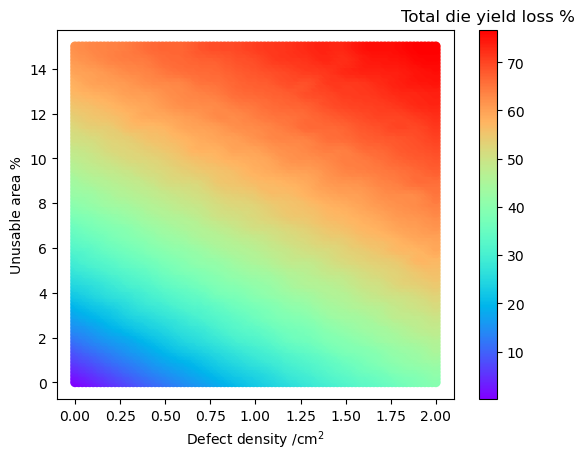

In [30]:
plt.scatter(x=X, y=Y, c=Z, cmap='rainbow')
clb=plt.colorbar()
clb.ax.set_title('Total die yield loss %')
plt.xlabel('Defect density /cm$^2$')
plt.ylabel('Unusable area %')

Text(0.5, 0, 'Total die yield loss %')

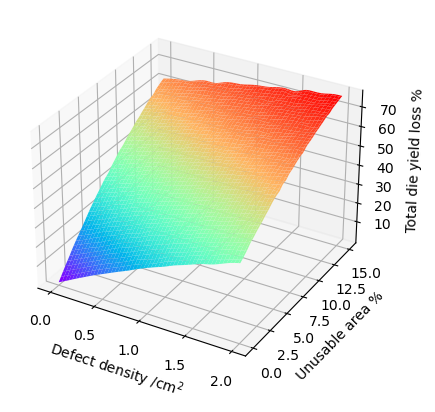

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='rainbow')
ax.set_xlabel('Defect density /cm$^2$')
ax.set_ylabel('Unusable area %')
ax.set_zlabel('Total die yield loss %')